In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividindo o conjunto de dados de forma estratificada em 10% para treino e 90% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

In [3]:
# Padronizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Criando o modelo de regressão logística
model = LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
# Realizando as previsões no conjunto de teste
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [11]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred, class_label):
    cm = confusion_matrix(y_true, y_pred)
    true_positives = cm[class_label, class_label]
    predicted_positives = np.sum(cm[:, class_label])
    return true_positives / predicted_positives

def recall(y_true, y_pred, class_label):
    cm = confusion_matrix(y_true, y_pred)
    true_positives = cm[class_label, class_label]
    actual_positives = np.sum(cm[class_label, :])
    return true_positives / actual_positives

def f1_measure(y_true, y_pred, class_label):
    prec = precision(y_true, y_pred, class_label)
    rec = recall(y_true, y_pred, class_label)
    return 2 * (prec * rec) / (prec + rec)

In [12]:
# Calculando a curva ROC e a métrica AUC para cada classe
fprs = []
tprs = []
aucs = []
for i in range(len(np.unique(y_test))):
    y_prob_class = y_prob[:, i]
    y_true_class = np.where(y_test == i, 1, 0)
    fpr, tpr, _ = roc_curve(y_true_class, y_prob_class)
    auc = roc_auc_score(y_true_class, y_prob_class)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc)

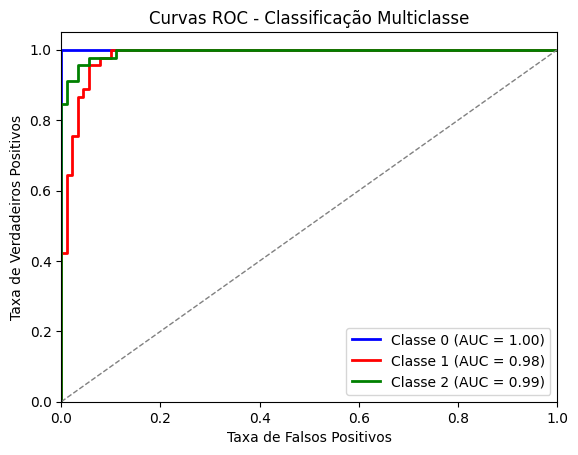

In [13]:
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fprs[i], tprs[i], color=color, lw=2, label='Classe {} (AUC = {:.2f})'.format(i, aucs[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC - Classificação Multiclasse')
plt.legend(loc="lower right")
plt.show()

In [14]:
print("AUC:", auc)

AUC: 0.994074074074074
